In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import time
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl

In [2]:
#Load dataset 
#There are 2, one for informations about nutriscore and an other one for generale information about produit.
df_charact=pd.read_csv(r"Food_Produit_charact.csv")
df_nutriscore_final=pd.read_csv(r"Food_Produit_nutriscore.csv")

**Install with pip, to work with package data profiling**

In [3]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# Exploratory Data Analysis

## 1. Univariate Analysis
### 1.1 Pandas Profil package

In [4]:
#initialize the profil report for nutriscore
profile_nutriscore = ProfileReport(df_nutriscore_final, title='Profiling Report Nutriscore', explorative=True, minimal=True)

In [5]:
#initialize the profil report for charact
profile_charact = ProfileReport(df_charact, title='Profiling Report charact', explorative=True, minimal=True)

In [6]:
#create file with result in reportory
#Uncomment create file, but it takes long time
profile_nutriscore.to_file("output_nutriscore_report.html")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#create file with result in reportory
#Uncomment create file, but it takes long time
profile_charact.to_file("output_charact_report.html")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

####  => Go check report in the directory (output_nutriscore_report.html /output_charact_report.html)

### 1.2 Pie Plot

Text(0.5, 1.0, 'nutriscore_code')

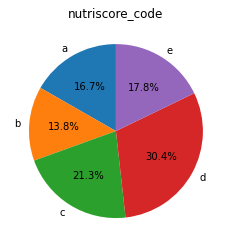

In [8]:
size=df_nutriscore_final.groupby(by="nutriscore_code").count()['product_name']
plt.pie(size, labels=size.index, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title("nutriscore_code")

## 2. Bivariate Analysis
### 2.1 Correlation matrice

In [9]:
#create matrix with the correction between each features
nutri_corr=df_nutriscore_final.corr()

In [10]:
#highlight value higher than 0.5<
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val >0.5 else 'black'
    return 'color: %s' % color

In [11]:
#print matrix with highlight
nutri_corr.style.applymap(color_negative_red)

,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruit_vegetable
nutriscore_score,1.000000,0.628970,0.610613,0.452624,-0.172130,0.094341,0.140669,-0.233991
energy-kcal_100g,0.628970,1.000000,0.579842,0.306161,0.306889,0.210981,-0.017288,-0.203985
saturated-fat_100g,0.610613,0.579842,1.000000,0.071298,-0.023379,0.179115,-0.004538,-0.138638
sugars_100g,0.452624,0.306161,0.071298,1.000000,0.018385,-0.297930,-0.125321,0.042960
fiber_100g,-0.172130,0.306889,-0.023379,0.018385,1.000000,0.170837,-0.062869,0.024774
proteins_100g,0.094341,0.210981,0.179115,-0.297930,0.170837,1.000000,0.119765,-0.179088
salt_100g,0.140669,-0.017288,-0.004538,-0.125321,-0.062869,0.119765,1.000000,-0.064852
fruit_vegetable,-0.233991,-0.203985,-0.138638,0.042960,0.024774,-0.179088,-0.064852,1.000000


In [12]:
#change the palette color for the heatmap
cmap = sns.diverging_palette(20, 20, as_cmap=True, center="light")

<AxesSubplot:>

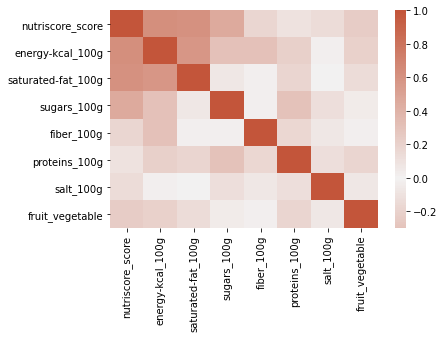

In [13]:
#print correlation between feature into values
sns.heatmap(nutri_corr, cmap=cmap, center=0)

### 2.2 BoxPlot

In [14]:
#means groupby nutricode
df_nutriscore_final.groupby("nutriscore_code").mean()

,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruit_vegetable
nutriscore_code,,,,,,,,
a,-3.421483,158.192877,0.510915,3.740479,3.762397,8.023660,0.295975,0.466792
b,0.868560,145.395012,1.088854,4.822754,2.163032,7.066194,0.543902,0.158245
c,5.770316,236.903848,2.563592,10.911599,2.762070,7.264113,1.198791,0.207734
d,14.065764,342.417729,6.962426,17.232107,2.131683,10.575127,1.445108,0.044250
e,21.888339,438.840069,13.426839,26.832122,1.711251,8.155296,1.216278,0.026488


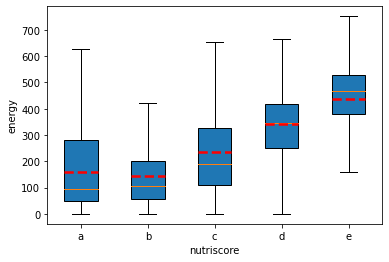

In [15]:
#print boxplot between nutriscore/energy 

meanlineprops = dict(linestyle='--', linewidth=2.5, color='red')
plt.figure()
data=[]
nutricode=['a','b','c','d','e']
for code in nutricode:
    data.append(df_nutriscore_final[df_nutriscore_final["nutriscore_code"]==code]['energy-kcal_100g'])

plt.boxplot(data, labels=nutricode,showfliers=False, patch_artist=True, showmeans=True, meanprops=meanlineprops,  meanline=True)


plt.xlabel("nutriscore")
plt.ylabel("energy")
plt.show()

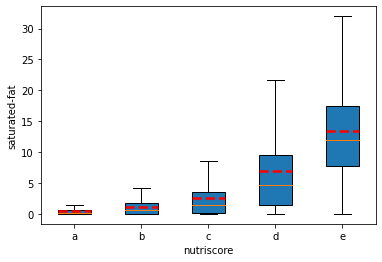

In [16]:
#print boxplot between nutriscore/ saturated fat 

plt.figure()

data=[]
nutricode=['a','b','c','d','e']
for code in nutricode:
    data.append(df_nutriscore_final[df_nutriscore_final["nutriscore_code"]==code]['saturated-fat_100g'])

plt.boxplot(data, labels=nutricode,showfliers=False, patch_artist=True, showmeans=True, meanprops=meanlineprops,  meanline=True)


plt.xlabel("nutriscore")
plt.ylabel("saturated-fat")
plt.show()

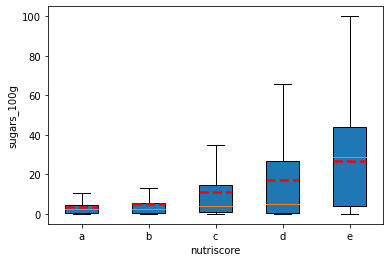

In [17]:
#print boxplot between nutriscore/ sugars

plt.figure()

data=[]
nutricode=['a','b','c','d','e']
for code in nutricode:
    data.append(df_nutriscore_final[df_nutriscore_final["nutriscore_code"]==code]['sugars_100g'])


plt.boxplot(data, labels=nutricode,showfliers=False, patch_artist=True, showmeans=True, meanprops=meanlineprops,  meanline=True)

plt.xlabel("nutriscore")
plt.ylabel("sugars_100g")

plt.show()

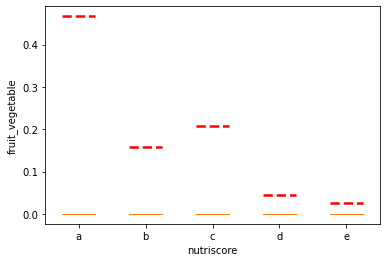

In [18]:
#print boxplot between nutriscore/vegetable


plt.figure()

data=[]
nutricode=['a','b','c','d','e']
for code in nutricode:
    data.append(df_nutriscore_final[df_nutriscore_final["nutriscore_code"]==code]['fruit_vegetable'])

plt.boxplot(data, labels=nutricode,showfliers=False, patch_artist=True, showmeans=True, meanprops=meanlineprops,  meanline=True)

plt.xlabel("nutriscore")
plt.ylabel("fruit_vegetable")

plt.show()

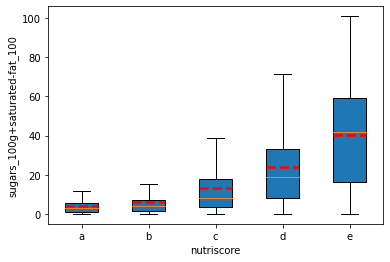

In [19]:
#print boxplot between nutriscore/ sum(sugars+saturated-fat)


plt.figure()

data=[]
nutricode=['a','b','c','d','e']
for code in nutricode:
    data.append(df_nutriscore_final[df_nutriscore_final["nutriscore_code"]==code][['sugars_100g',"saturated-fat_100g"]].sum(axis=1))

plt.boxplot(data, labels=nutricode,showfliers=False, patch_artist=True, showmeans=True, meanprops=meanlineprops,  meanline=True)

plt.xlabel("nutriscore")
plt.ylabel("sugars_100g+saturated-fat_100")

plt.show()

### 2.3 Distplot between 2 parameter

C:\Users\Sirzesx\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sirzesx\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


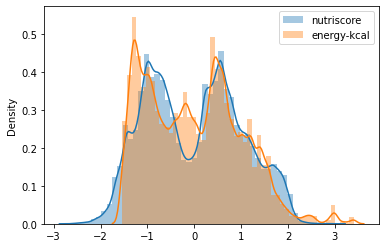

In [20]:
df_dist=df_nutriscore_final[["nutriscore_score","energy-kcal_100g"]]
#normalize
df_dist_norm=preprocessing.StandardScaler().fit_transform(df_dist)
#print distplot
sns.distplot(df_dist_norm[:,0], kde=True, label='nutriscore')
sns.distplot(df_dist_norm[:,1], kde=True, label='energy-kcal')
plt.legend()


### 2.4 Bar plot

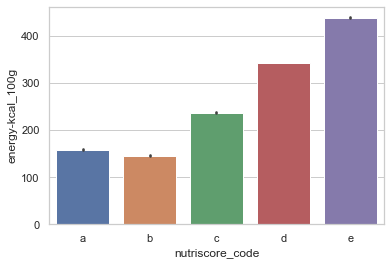

In [21]:
sns.set_theme(style="whitegrid")
data=df_nutriscore_final[['saturated-fat_100g','energy-kcal_100g','nutriscore_code']]
ax = sns.barplot(x="nutriscore_code", y="energy-kcal_100g", data=data, order=["a","b","c","d","e"])

### 2.5 FaceGrid+ScatterPlot  
Show us the evolution of energy and saturated fat through nutriscore code

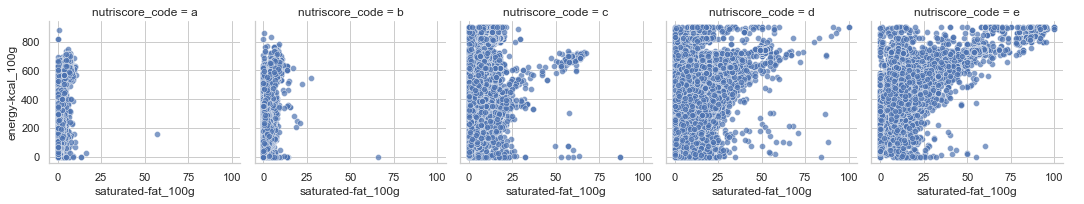

In [22]:
data=df_nutriscore_final[['saturated-fat_100g','energy-kcal_100g','nutriscore_code']]
#create grid
g = sns.FacetGrid(data, col="nutriscore_code", col_order=["a","b","c","d","e"])
#Print plot
g.map(sns.scatterplot, "saturated-fat_100g", "energy-kcal_100g", alpha=.7)
g.add_legend()


Show us the evolution of energy and sugar through nutriscore code

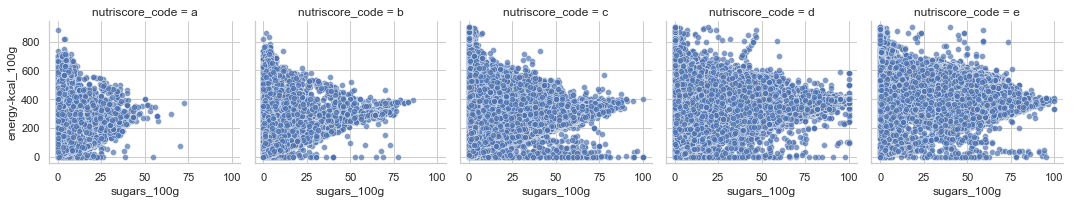

In [23]:
data=df_nutriscore_final[['sugars_100g','energy-kcal_100g','nutriscore_code']]
g = sns.FacetGrid(data, col="nutriscore_code", col_order=["a","b","c","d","e"])
g.map(sns.scatterplot, "sugars_100g", "energy-kcal_100g", alpha=.7)
g.add_legend()


#### ANOVA

In [24]:
#fonction print ETA² => ANOVA Rapport de correlation Pearson
#Proche de 0 : Moyenne par classe égale =>pas de relation
#Entre 0 et 1 : Moyenne par classe différent => relation


# x :qualitative
# y: quantitative
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y]) #variation totale (sum des carrée totale)
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes]) #variation interclasse
    return SCE/SCT



eta_squared(df_nutriscore_final["nutriscore_code"],df_nutriscore_final["energy-kcal_100g"])

0.3330023587570695

In [25]:
#eta_squared(df_nutriscore_final["nutriscore_code"],df_nutriscore_final["fat_100g"])

In [26]:
eta_squared(df_nutriscore_final["nutriscore_code"],df_nutriscore_final["saturated-fat_100g"])

0.34372639298473623

In [27]:
eta_squared(df_nutriscore_final["nutriscore_code"],df_nutriscore_final["sugars_100g"])

0.17746608258623645

In [28]:
eta_squared(df_nutriscore_final["nutriscore_code"],df_nutriscore_final[["sugars_100g","saturated-fat_100g",]].mean(axis=1))

0.35361472840106617

### MultiVariate Analysis :PCA

In [29]:
#df_nutriscore_2.set_index("product_name", inplace=True)

In [30]:
df_nutriscore_final

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruit_vegetable,nutriscore_code
0,moutarde au moût de raisin,18.0,223.817254,2.2,22.0,0.000000,5.1,4.60,0.0,d
1,Salade de carottes râpées,1.0,32.000000,0.1,3.9,0.618450,0.9,0.42,0.0,b
2,Tarte noix de coco,14.0,381.000000,15.5,21.9,4.400000,4.6,0.10,0.0,d
3,Compote de poire,-2.0,157.000000,0.0,27.0,3.600000,0.6,0.00,3.0,a
4,Salade de macedoine de légumes,1.0,143.000000,1.0,1.0,1.777993,1.9,0.27,0.0,b
...,...,...,...,...,...,...,...,...,...,...
569696,Mousse au chocolat noir,17.0,346.000000,17.0,18.0,0.982477,6.0,0.19,0.0,d
569697,Riz parfumé,0.0,351.000000,0.0,0.0,6.703548,7.0,0.00,0.0,b
569698,Minis beignets,15.0,333.000000,6.0,10.4,1.770370,7.4,1.10,0.0,d
569699,Erdbeerkuchen 1019g tiefgefroren,12.0,221.238728,4.8,24.0,1.073150,2.6,0.28,0.0,d


In [31]:
PCA_df=df_nutriscore_final.drop(columns=["product_name"])

#encode letter to number (a,b,c,d,e)
encoder = LabelEncoder()
PCA_df['nutriscore_code']=encoder.fit_transform(PCA_df['nutriscore_code'].astype(str))



In [32]:
#prepare values for PCA
PCA_val=PCA_df.values
names=df_nutriscore_final.product_name
features=PCA_df.columns

In [33]:
#print(names)
#print(features)

In [34]:
#center and reduce values
PCA_df_scaled=preprocessing.StandardScaler().fit_transform(PCA_val)

In [35]:
#nb of plan we keep for PCA
n_comp=7 #min(X.shape)
n_comp

7

In [36]:
#Calculate principal componente (PCA/ACP)
pca=decomposition.PCA(n_components=0.95)
pca.fit(PCA_df_scaled)

PCA(n_components=0.95)

In [37]:
#pourcentage cumulé plan pca
np.cumsum(pca.explained_variance_ratio_)

array([0.3589917 , 0.52663287, 0.6692624 , 0.77082354, 0.86559019,
       0.93152756, 0.96591908])

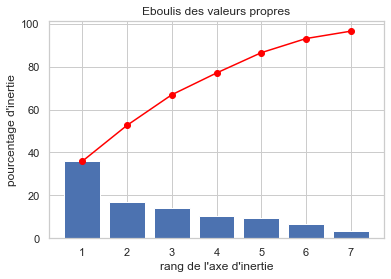

In [38]:
#Eboulis des valeurs propres
display_scree_plot(pca)

In [39]:
#calculate the relation between PCA plan and each features
pcs=pca.components_
pcs
# Project df value in PCA plan
PCA_projected = pca.transform(PCA_df_scaled)

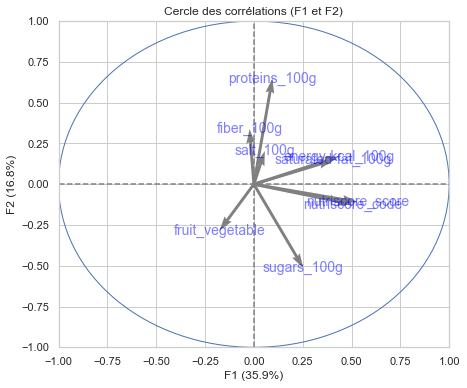

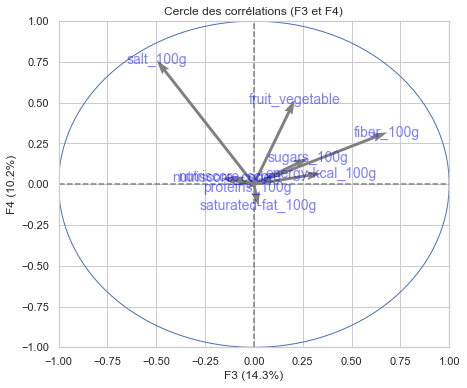

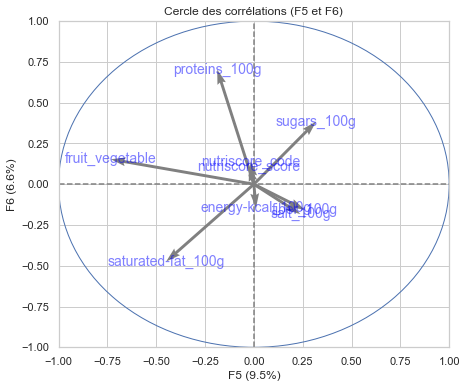

In [40]:
#display in circle the relation between PCA plan and each features
display_circles(pcs, n_comp, pca,[(0,1),(2,3),(4,5)], labels = np.array(features) )

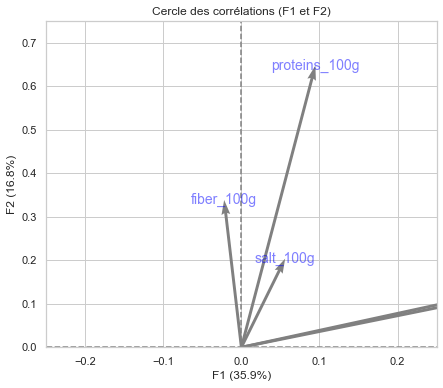

In [41]:
display_circles(pcs, n_comp, pca,[(0,1)],lims=[-.25, .25, 0 ,0.75], labels = np.array(features) )

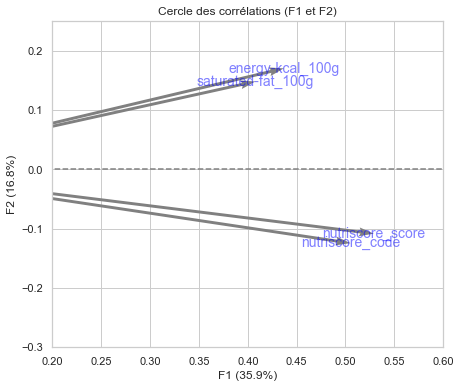

In [42]:
display_circles(pcs, n_comp, pca,[(0,1)],lims=[0.2, 0.6, -0.3,0.25], labels = np.array(features) )

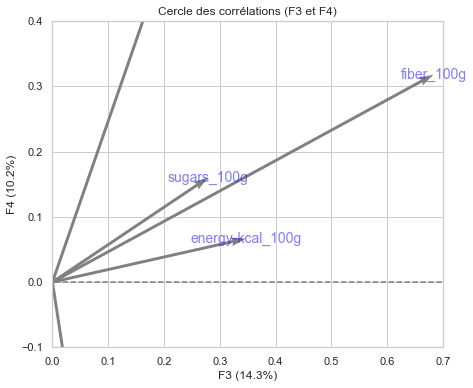

In [43]:
display_circles(pcs, n_comp, pca,[(2,3)],lims=[0, 0.7, -0.1,0.4], labels = np.array(features) )

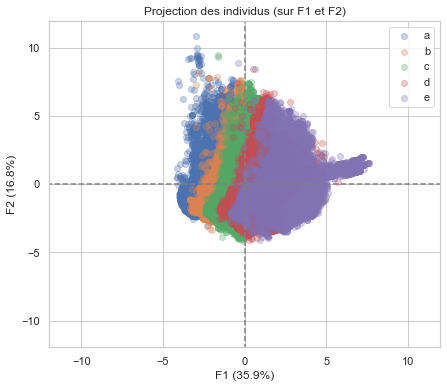

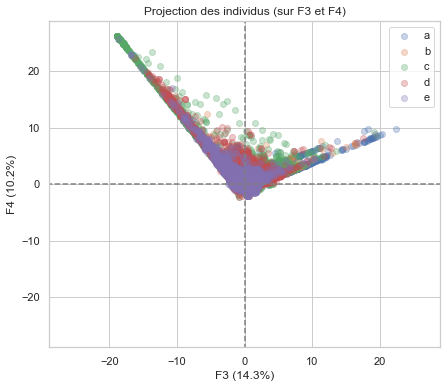

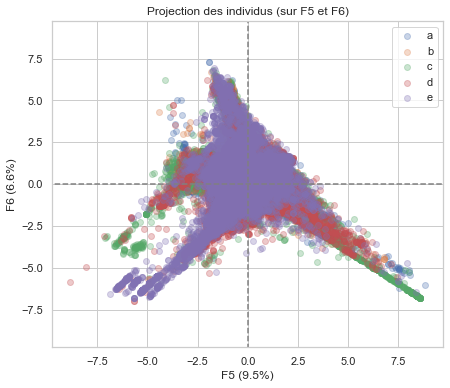

In [44]:
#print projection df value in PCA plan
display_factorial_planes(PCA_projected, n_comp, pca, [(0,1),(2,3),(4,5)], alpha = 0.3, illustrative_var = df_nutriscore_final["nutriscore_code"])
plt.show()

C:\Users\Sirzesx\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


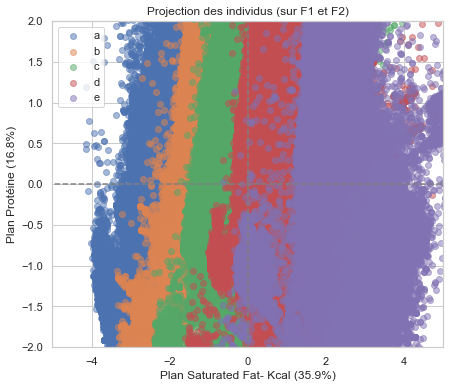

In [45]:
#display_factorial_planes_modif(PCA_projected, n_comp, pca, [(0,1)], lims=[-5, 5, 20,30] ,  alpha = 0.5, illustrative_var = df_nutriscore_final["nutriscore_code"])
#display_factorial_planes_modif(PCA_projected, n_comp, pca, [(0,1)], lims=[-5, 5, 10,20] ,  alpha = 0.5, illustrative_var = df_nutriscore_final["nutriscore_code"])
#display_factorial_planes_modif(PCA_projected, n_comp, pca, [(0,1)], lims=[-5, 5, 0,10] ,  alpha = 0.5, illustrative_var = df_nutriscore_final["nutriscore_code"])
display_factorial_planes_modif(PCA_projected, n_comp, pca, [(0,1)], lims=[-5, 5, -2,2] ,  alpha = 0.5, illustrative_var = df_nutriscore_final["nutriscore_code"], planName=["Saturated Fat- Kcal","Protéine"])


#lims=[-.5, 0.5, 0.3,0.4] ,